# 개요
* 참여중인 데이터 엔지니어링 스터디에서 배우는 내용 정리
  * 데이터 수집, 정제 : pyspark, airflow
  * 저장 : elasticsearch
  * 시각화 : kibana

# 4주차 과제리뷰

## ElasticSearch

* ES에 기록하기
```python
df.write.format("org.elasticsearch.spark.sql") \
      .mode("append") \
      .option("es.nodes", <host주소>) \
      .option("es.index.auto.create",  "yes") \
      .option("es.resource", <대상 index>) \
      .save()
```

* kibana
  * Elastic Stack을 탐색할 수 있게 하는 시각화 및 관리 서비스
    * 데이터 검색/모니터링/보안관리/분석/시각화
  * Elastic search의 데이터가 들어오는 것도 쉽게 볼 수 있다 (일일이 쿼리 필요없이)

# 5주차 수업정리

## Airflow

* Workflow Platform
  * Batch Task 처리/스케줄링/모니터링을 위한 플랫폼
  * 한 눈에 볼 수 있는 UI + Task병렬처리 + 모니터링/스케줄링 필요함
  * crontab은 스케줄링은 가능하지만, 한 눈에 볼 수 있는 UI가 없고 병렬처리 기능 없음
<br>

* Airflow
  * Batch Task 처리/스케줄링/모니터링을 위한 Workflow Platform 중 하나
  * open-source platform forbatch-oriented workflows
  * 여러 플러그인을 제공해 connectivity 좋음
<br>

* Airflow UI(Dashboard)
  * 실패한 경우 처음부터 실행할 필요 없이, 실패한 log만 보거나 실행 가능
  * 다양한 Status : deferred, failed, running 등
  * Calender탭 : 요일별 성공/실행 등
  * Task Duration탭 : 작업별 소요시간 등
  * Code탭 : 코드실행 결과 등을 확인. 수정은 불가하나 수정사항은 바로 확인 가능
  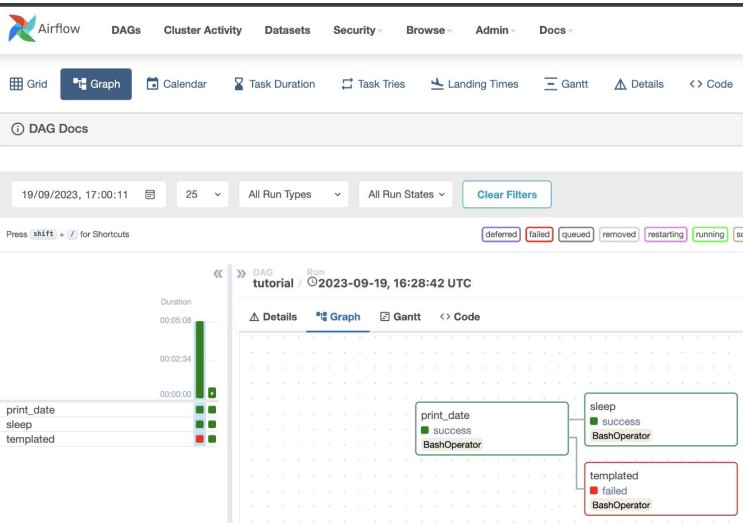
<br>

* Airflow UI(DAGs)
  * 작업별 on/off, 태그 설정, Last Run 등 확인 가능
  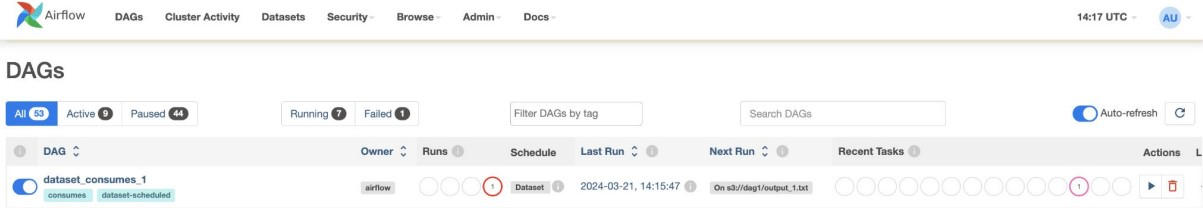
<br>

* Airflow UI(Calender)
  * 큰 장애가 있던 날 등을 확인 가능
  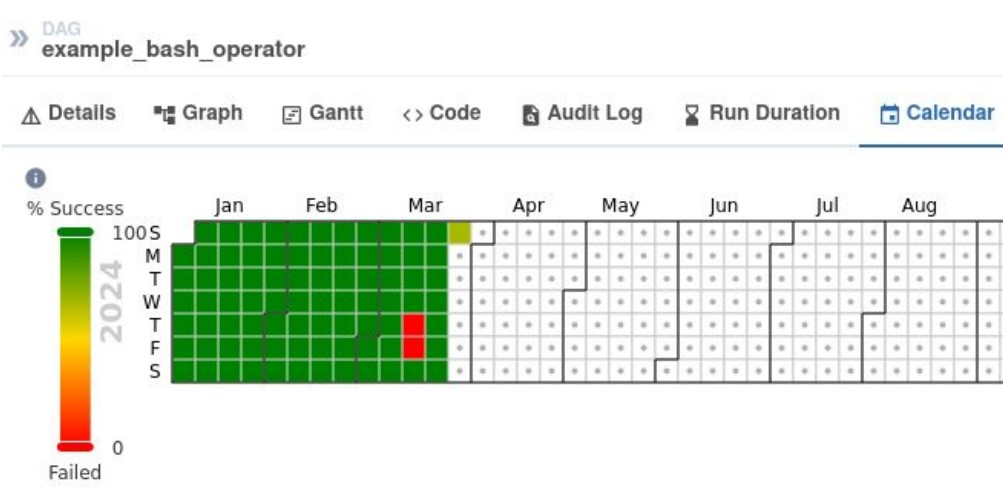
<br>

* Airflow 구조
  * 플러그인을 Webserver와 Scheduler에 설치
  * 작업을 설정하면 Metadata DB에 들어가고 Scheduler가 읽어들여 작업 스헹
  * 유저가 작성한 DAG로 작업수행 후 결과를 다시 DB에 저장
  * 작업결과를 Webserver가 읽어 UI로 보여줌
  * **위와 같은 구조이므로 DB가 먼저 떠야함**
    * 실습환경은 postgres로 되어있음(**depends_on: postgres**) <br>
  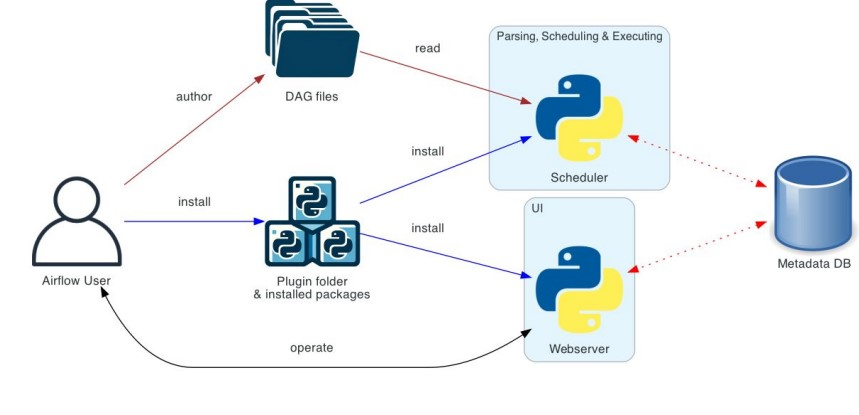
<br>

* Airflow 구조 (실무적 시나리오)
  * DAG작성자,Workflow플랫폼 관리자, Operation user(작업여부 등 확인, DAG작성자일 수 있음)
  * 여러 개의 Execution node가 작성된 DAG job 실행
  * Operation user가 실행결과나 로그 등을 확인하거나 긴급/필요한 경우 작업 중단 등 수행
  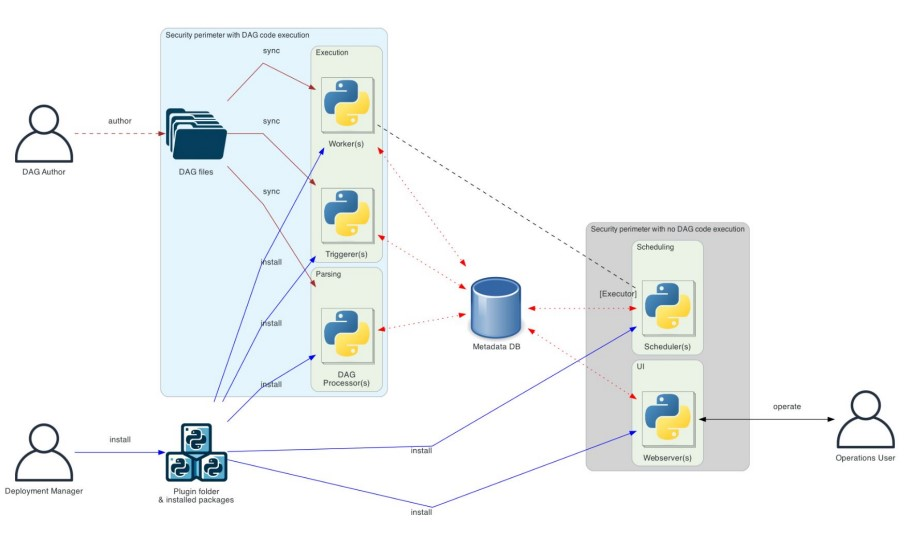
<br>

* Components(구성요소)
  * Database : Storing metadata
  * Scheduler : Schedule & execute DAG 
  * Worker : Execute tasks
    * Scheduler와 같은 역할. Scheduler가 여러개 뜬 것과 비슷하게 이해
  * Web server : UI
<br>

* REST API
  * Airflow설정이나 강제실행 등을 외부에서 원격으로 REST API호출해서 가능
  * 운영 편의성의 한 방법으로 제공(리소스 조정이나 권한부여 등)
  * json input & response
<br>

* Airflow Pros & Cons(장단점)
  * 장점
    * 범용성 높음(타 워크플로우 대비 플러그인 많음)
    * 활발한 커뮤니티(유저 많음)
    * Python으로 쉽고, 정교한(xml보다) DAG 구성가능
    * Retry기능
  * 단점
    * 기술적으로 성숙 중(여러 이슈가 있음)
      * 실무에서 사용하기에는 무리 없는 정도
<br>

* 기타 유사 플랫폼
  * Jenkins (Devops구성 등에 많이 사용)
    * Hudson에서 Jenkins로 이름변경. 처음에는 build 실패시 로그 등 확인하고자 만들어짐(build자동화)
      * 실패가 누적되면 좌측 상단 사람아이콘이 점점 화난 얼굴로 바뀌어 확인 가능
    * 플러그인을 활용해서 자동화 작업 처리
      * 업데이트가 안되거나 불안정한 플러그인이 좀 있음
    * Task파이프라인을 만들어 CI/CD를 구축하는데 사용
  * Azkaban
    * Hadoop Batch job을 위해 LinkedIn 이 개발
    * UI담당 웹서버 + Auth + 스케줄링 + 모니터링이 각각 1개만 존재
      * 위와 함께 별도의 executor가 다수 존재(executor만 다수 존재)
    * 다양한 기능 부족(airflow는 좀 더 범용적인 타겟)
    * multiple executor mode 설정해야 병렬처리 가능
    * busy-waiting 등의 작업대기 패턴 지정 불가
    * Hadoop기반은 좀 더 유리한 점이 있고, Airflow와는 서로 있거나 없는 기능이 존재
  * Oozie, Luigi 등
<br>

* Airflow관련 실습 참고사항(세팅방법)
  * Dockerfile
    * 실습상 Pyspark로 실행되므로 Airflow에 파이썬 패키지를 깔 일은 거의 없음
      * Airflow에서 실행하기 위한 패키지 등이 필요하다면 Dockerfile을 수정
      * 하단 코드의 `pip install` 부분을 수정
    * airflow가 뜨지 않는다면 arm64가 맞는지 확인 후 수정
      * 하단 코드의 `ENV JAVA_HOME /usr/lib/jvm/java-11-openjdk-arm64` 수정
    * Dockerfile수정 후 단순히 down & up하면 반영되지 않음
      * 기존 이미지가 있는지 확인 후 이미지가 있으면 Docker는 별도 작업을 하지 않음
      * **docker stop → rm → rmi** 하여 기존 이미지 제거 후, **up하여 build 진행** 
        ```
        FROM apache/airflow:2.7.1-python3.11

        USER root
        RUN apt-get update
        RUN apt-get install -y gcc python3-dev openjdk-11-jdk wget
        RUN apt-get clean

        # Set JAVA_HOME environment variable
        ENV JAVA_HOME /usr/lib/jvm/java-11-openjdk-arm64

        USER airflow
        
        RUN pip install apache-airflow apache-airflow-providers-apache-spark pyspark elasticsearch
        ```
  * Docker-compose.yml
    ```yaml
    webserver:
      <<: *airflow-common
      command: webserver   # application 중 webserver
      ports:
        - "8081:8080"
      depends_on:
        - scheduler # scheduler가 먼저떠야해서 depends_on 설정

    scheduler:
      <<: *airflow-common # 오류가 있다면 하단 command에 'airflow db init &&' 를 추가
      command: bash -c "airflow db migrate && airflow users create --username airflow --firstname airflow --lastname airflow --role Admin --email airflow@gmail.com --password airflow && airflow scheduler"

    ```
<br>

* Airflow 설치방법
  * Installation
    * https://airflow.apache.org/docs/apache-airflow/stable/installation/index.html
  * Quick Start
    * https://airflow.apache.org/docs/apache-airflow/stable/start.html


## DAG 작성하는법

* DAG(Directed Acyclic Graph)
  * 작업의 dependencies과 relationships를 정의
  * 다양한 Operator가 있음 (Operator = Task의 단위)
<br>

* DAG 선언
  * with문 사용
    ```python
    from airflow import DAG
    from airflow.operators.empty import EmptyOperator

    with DAG(
        dag_id="my_dag_name",
        start_date=datetime.datetime(2021, 1, 1),
        schedule="@daily", # 리소스가 비는 시간에 실행해줌
    ):

    EmptyOperator(task_id="task")
    ```
  * 변수에 할당 후 operator에 넣기
    ```python
    my_dag = DAG(
        dag_id="my_dag_name",
        start_date=datetime.datetime(2021, 1, 1),      
        schedule="@daily",
    )
    EmptyOperator(task_id="task", dag=my_dag)
    ```
  * 데코레이터 사용
    ```python
    from airflow.decorators import dag

    @dag(start_date=datetime.datetime(2021, 1, 1), schedule="@daily") 
    def generate_dag():
        EmptyOperator(task_id="task")

    generate_dag()
    ```
  * 데코레이터로 task지정 (+순서지정)
    ```python
    from airflow.decorators import task
    from airflow.operators.bash import BashOperator

    # A DAG represents a workflow, a collection of tasks
    with DAG(dag_id="demo", start_date=datetime(2022, 1, 1), schedule="0 0 * * *") as dag: # Tasks are represented as operators
        hello = BashOperator(task_id="hello", bash_command="echo hello")

        @task()
        def airflow():
            print("airflow")

        # Set dependencies between tasks
        hello >> airflow()
    ```
<br>

* Operators(플러그인 역할)
  * HttpOperator
  * MySqlOperator
  * PostgresOperator
  * MsSqlOperator
  * OracleOperator
  * JdbcOperator
  * DockerOperator
  * HiveOperator
  * S3FileTransformOperator
  * PrestoToMySqlOperator
  * SlackAPIOperator

* Python operator예시
  * 샘플코드에서 xcom_pull()은 DAG 내의 task 사이에서 데이터를 전달할 때 사용
    ```python
    dag = DAG(
        dag_id="example_template_as_python_object",
        schedule=None,              # @daily, 0 0 * * * 등
        start_date=pendulum.datetime(2021, 1, 1, tz="UTC"),
        catchup=False,              # start_date와 현재 사이의 실행이 안된 분량을 catchup=True하여 실행
        render_template_as_native_obj=True,
        )

    # task 데코레이터 사용
    @task(task_id="extract")
    def extract():
        data_string = '{"1001": 301.27, "1002": 433.21, "1003": 502.22}' 
        return json.loads(data_string)

    extract_task = extract()

    # Python operator 사용
    def transform(order_data):
        print(type(order_data))
        total_order_value = 0
        for value in order_data.values():
        total_order_value += value
        return {"total_order_value": total_order_value}

    transform_task = PythonOperator(
        task_id="transform",
        # transform함수의 argument넣기 & xcom_pull로 extract task데이터 가져오기
        op_kwargs={"order_data": "{{ti.xcom_pull('extract')}}"}, 
        python_callable=transform,
        )

    extract_task >> transform_task
    ```
<br>

* Dependency 정의(예시)
  * 순서가 중요하지 않다면 리스트[]에 넣기
    * first_task >> [second_task, third_task]
  * 방향(<<)에 따라 역순으로 실행
    * third_task << fourth_task
  * first_task 후 [second_task, third_task]
    * first_task.set_downstream([second_task, third_task])
  * fourth_task 후 third_task
    * third_task.set_upstream(fourth_task)
  * cross_downstream
    ```python
    # Before
    # [op1, op2] >> op3
    # [op1, op2] >> op4

    # After (Before의 2줄 코드를 아래와 같이 1줄로 표현 가능)
    from airflow.models.baseoperator import cross_downstream

    cross_downstream([op1, op2], [op3, op4])
    ```
  * chain
    ```python
    # Before
    # op1 >> op2 >> op3 >> op4

    # After1 (>> 대신 chain 사용)
    from airflow.models.baseoperator import chain

    chain(op1, op2, op3, op4)
    # After2 (task많은 경우 comprehension으로 dynamic하게 사용)
    chain(*[EmptyOperator(task_id='op' + i) for i in range(1, 6)])
    ```
<br>

* Retry
  * default_args에 넣어서 설정
  * 후반부로 갈수록 느리게하는 exponential 전략 등 있음
  ```python
    from airflow.models.dag import DAG
    from airflow.operators.bash import BashOperator
    import datetime
    import pendulum

    dag = DAG(
        "tutorial",
        default_args={
            "depends_on_past": True, # 과거 실행에 의존
            "retries": 1,            # retry 횟수
            "retry_delay": datetime.timedelta(minutes=3), # retry주기
            },
        start_date=pendulum.datetime(2015, 12, 1, tz="UTC"), 
        description="A simple tutorial DAG", # UI에서 보임
        schedule="@daily", 
        catchup=False,
    )
  ```
<br>

* Branch
  * 샘플코드
    ```python
        @task.branch(task_id="branch_task")

        def branch_func(ti=None):
            xcom_value = int(ti.xcom_pull(task_ids="start_task")) 
            if xcom_value >= 5:
                return "continue_task"
            elif xcom_value >= 3:
                return "stop_task"
            else:
                return None

        start_op = BashOperator(
            task_id="start_task",
            bash_command="echo 5",
            do_xcom_push=True, # 터미널에 찍힌 위의 5값이 xcom으로 전달
            dag=dag,
            )

        branch_op = branch_func()

        # branch_func에 필요한 "continue_task", "stop_task"
        continue_op = EmptyOperator(task_id="continue_task", dag=dag) 
        stop_op = EmptyOperator(task_id="stop_task", dag=dag) 
        
        start_op >> branch_op >> [continue_op, stop_op]
    ```
  * 샘플코드 with 이미지
    * 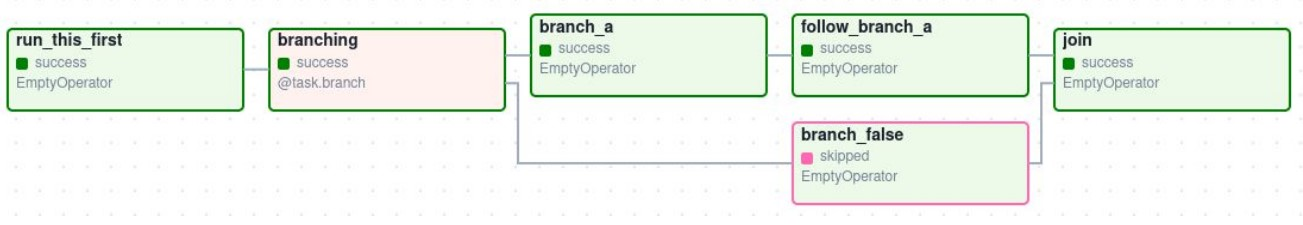
      ```python
        dag = DAG(
            dag_id="branch_without_trigger",
            schedule="@once",
            start_date=pendulum.datetime(2019, 2, 28, tz="UTC"),
        )

        run_this_first = EmptyOperator(task_id="run_this_first", dag=dag)

        @task.branch(task_id="branching")
        def do_branching():
            return "branch_a"

        branching = do_branching()
        branch_a = EmptyOperator(task_id="branch_a", dag=dag)

        follow_branch_a = EmptyOperator(task_id="follow_branch_a", dag=dag) 
        branch_false = EmptyOperator(task_id="branch_false", dag=dag) 
        join = EmptyOperator(task_id="join", dag=dag)

        run_this_first >> branching

        branching >> branch_a >> follow_branch_a >> join
        branching >> branch_false >> join
      ```
<br>

* Trigger rule
  * 종류
    * all_success (**default**): All upstream tasks have succeeded
    * all_failed: All upstream tasks are in a failed or upstream_failed state
    * all_done: All upstream tasks are done with their execution
    * all_skipped: All upstream tasks are in a skipped state
    * one_failed: At least one upstream task has failed (does not wait for all upstream tasks to be done)
    * one_success: At least one upstream task has succeeded (does not wait for all upstream tasks to be done)
    * one_done: At least one upstream task succeeded or failed
    * none_failed: All upstream tasks have not failed or upstream_failed - that is, all upstream tasks have succeeded or been skipped
    * none_failed_min_one_success: All upstream tasks have not failed or upstream_failed, and at least one upstream task has succeeded.
    * none_skipped: No upstream task is in a skipped state - that is, all upstream tasks are in a success, failed, or upstream_failed state
    * always: No dependencies at all, run this task at any time
  * 샘플코드
    ```python
    with DAG(
        dag_id="latest_only_with_trigger",
        schedule=datetime.timedelta(hours=4),
        start_date=pendulum.datetime(2021, 1, 1, tz="UTC"),
        catchup=False,
        tags=["example3"], # UI에서 태그로 확인가능
    ) as dag:

        latest_only = LatestOnlyOperator(task_id="latest_only")
        task1 = EmptyOperator(task_id="task1")
        task2 = EmptyOperator(task_id="task2")
        task3 = EmptyOperator(task_id="task3")
        # trigger_rule 입력
        ## TriggerRule.ALL_DONE 이므로 upstream인 latest_only/task1/task2 실행되면 실행
        task4 = EmptyOperator(task_id="task4", trigger_rule=TriggerRule.ALL_DONE) 
        
        latest_only >> task1 >> [task3, task4]
        task2 >> [task3, task4]
    ```
<br>

* Task Group
  * Task를 묶고 싶을 때 사용(+설정을 일괄로 부여하고 싶을 때)
    * 샘플코드1 (Task묶기)
      ```python
      from airflow.decorators import task_group

      # task를 그룹으로 묶음
      @task_group()
      def group1():
          task1 = EmptyOperator(task_id="task1")
          task2 = EmptyOperator(task_id="task2")

      task3 = EmptyOperator(task_id="task3")

      group1() >> task3
      ```
    * 샘플코드2 (Task를 묶고 설정을 일괄로 부여)
      * 우선순위는 task에 개별로 부여한 설정을 적용한 후, group의 설정을 적용한다
        ```python
        # task를 그룹으로 묶고, retries 등 일괄로 설정할 때
        @task_group(default_args={"retries": 3})
        def group1():
            """This docstring will become the tooltip for the TaskGroup."""
            task1 = EmptyOperator(task_id="task1")
            task2 = BashOperator(task_id="task2", bash_command="echo Hello World!", retries=2) 
            print(task1.retries)  # print값 : 3
            print(task2.retries)  # print값 : 1
        ```
<br>

* Sub Dags
  * Sub Dags끼리 Args(설정) 등을 적용할 때 사용
  * 샘플코드(Dag를 만든 후, SubDagOperator를 사용)
    ```python
    with DAG(
        dag_id=DAG_NAME,
        default_args={"retries": 2},
        start_date=datetime.datetime(2022, 1, 1),
        schedule="@once",
        tags=["example"],
    ) as dag:

        start = EmptyOperator(task_id="start",)

        section_1 = SubDagOperator(task_id="section-1",
            subdag=subdag(DAG_NAME, "section-1", dag.default_args), )

        some_other_task = EmptyOperator(task_id="some-other-task",)

        section_2 = SubDagOperator(task_id="section-2",
            subdag=subdag(DAG_NAME, "section-2", dag.default_args), )

        end = EmptyOperator(task_id="end",)

        start >> section_1 >> some_other_task >> section_2 >> end
    ```
<br>

* Sub Dag와 Task group 차이
  * Configuration 적용
    * Sub dags는 여러 Dag Conf, Task group은 하나의 Dag Conf
  * View and statistics
    * Sub dags는 여러개의 현황이, Task group은 하나로 보임
  * Job의 병렬 처리
    * Sub dags는 여러개의 job으로, Task group은 하나의 job으로 executor가 실행
  * 선언(declaration)과 규칙(naming restirctions)
    * Sub dags가 좀 더 어려움
<br>